In [1]:
# Importing all the necessary libraries and loading the dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
ds=pd.read_csv("taxis.csv", encoding="latin-1")
ds

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
# Displaying all the column names

ds.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
# Displaying the datatype of the columns

ds.dtypes

,0
pickup,object
dropoff,object
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


In [29]:
# Converting the datatypes into suitable types.

ds["color"]=ds["color"].astype(str)
ds["payment"]=ds["payment"].astype(str)
ds["pickup_zone"]=ds["pickup_zone"].astype(str)
ds["dropoff_zone"]=ds["dropoff_zone"].astype(str)
ds["pickup_borough"]=ds["pickup_borough"].astype(str)
ds["dropoff_borough"]=ds["dropoff_borough"].astype(str)

In [30]:
from datetime import datetime

ds["pickup"]=ds["pickup"].astype(str)
ds["pickup_date"]=ds["pickup"].str.split(" ").str[0]
ds["pickup_time"]=ds["pickup"].str.split(" ").str[1]

ds["pickup_date"]=pd.to_datetime(ds["pickup_date"])

# Again,

ds["dropoff"]=ds["dropoff"].astype(str)
ds["dropoff_date"]=ds["dropoff"].str.split(" ").str[0]
ds["dropoff_time"]=ds["dropoff"].str.split(" ").str[1]

ds["dropoff_date"]=pd.to_datetime(ds["dropoff_date"])

In [5]:
# Filling out empty values.

ds["payment"]=ds["payment"].replace("nan","cash")
ds["payment"]


,payment
0,credit card
1,cash
2,credit card
3,credit card
4,credit card
...,...
6428,credit card
6429,credit card
6430,cash
6431,credit card


In [7]:
# New dataset after all the editing

ds

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20:21:09,2019-03-23,20:27:24
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16:11:55,2019-03-04,16:19:00
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17:53:01,2019-03-27,18:00:25
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,01:23:59,2019-03-10,01:49:51
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,13:27:42,2019-03-30,13:37:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,2019-03-31,09:51:53,2019-03-31,09:55:27
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,2019-03-31,17:38:00,2019-03-31,18:34:23
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,2019-03-23,22:55:18,2019-03-23,23:14:25
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019-03-04,10:09:25,2019-03-04,10:14:29


Numpy Questions

In [8]:
# Create a NumPy array representing the unique number of passengers in the dataset.

unique_arr=np.unique(ds["passengers"])
print(unique_arr)


[0 1 2 3 4 5 6]


In [12]:
# Convert the "fare" and "tip" columns into separate NumPy arrays and compute their mean, median, and standard deviation.

fare_arr=ds["fare"].to_numpy()
tip_arr=ds["tip"].to_numpy()

fare_mean=np.mean(fare_arr)
print(fare_mean)

fare_med, fare_std= np.median(fare_arr), np.std(fare_arr)

tip_mean, tip_med, tip_std= np.mean(tip_arr), np.median(tip_arr), np.std(tip_arr)

print(fare_med)
print(fare_std)
print(tip_mean)
print(tip_med)
print(tip_std)

13.091072594434944
9.5
11.550906376376894
1.9792196486864604
1.7
2.448369271819864


In [13]:
# Create a NumPy array from the "distance" column and normalize it to a range between 0 and 1.

dist_arr=ds["distance"].to_numpy()
norm_dist=(dist_arr-np.min(dist_arr))/(np.max(dist_arr)-np.min(dist_arr))
print(norm_dist)

[0.04359673 0.02152589 0.0373297  ... 0.11280654 0.03051771 0.10490463]


In [14]:
# Write a function that takes a NumPy array of fares and returns a boolean mask indicating which fares are above the 75th percentile.

def perc(fares):
  threshold=np.percentile(fares,75)
  return fares>threshold

fares=ds["fare"].to_numpy()

mask=perc(fares)
print(mask)

[False False False ...  True False False]


In [16]:
# Compute the correlation coefficient between the "distance" and "fare" columns using NumPy.

d_arr=ds["distance"].to_numpy()
f_arr=ds["fare"].to_numpy()

corr_coef=np.corrcoef(d_arr,f_arr)[0,1]
print(corr_coef)

0.9201077027895752


In [17]:
# Generate a NumPy array representing all the "total" values and apply element-wise rounding to 2 decimal places.

total_arr=ds["total"].to_numpy()

round_arr=np.round(total_arr,2)
print(round_arr)

[12.95  9.3  14.16 ... 17.3   6.8  20.16]


In [20]:
# Use NumPy to create a one-hot encoded representation of the "color" column, assuming limited unique values.

from sklearn.preprocessing import OneHotEncoder

col_arr=ds["color"].to_numpy().reshape(-1,1)

# One-hot encode
enc=OneHotEncoder(sparse_output=False)
enc_col=enc.fit_transform(col_arr)
print(enc_col)
print(enc.categories)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
auto


Pandas Questions

In [6]:
# Convert the "pickup" column to a DateTime format and extract the hour and weekday.

# We have made the necessary conversions above, Now,

ds["pickup_time"]=pd.to_datetime(ds["pickup_time"])

hour=ds["pickup_time"].dt.hour
print("The hours are:")
hour

The hours are:


<ipython-input-6-d4ca07f957f0>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds["pickup_time"]=pd.to_datetime(ds["pickup_time"])


,pickup_time
0,20
1,16
2,17
3,1
4,13
...,...
6428,9
6429,17
6430,22
6431,10


In [ ]:
# Filter out all trips where "distance" is zero or "total" is negative.

ds[(ds["distance"]==0) & (ds["total"]<10)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.0,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,2019-03-21,2025-02-05 17:21:44,2019-03-21,17:21:49
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.0,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan,2019-03-08,2025-02-05 04:50:48,2019-03-08,04:51:07
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.0,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,2019-03-04,2025-02-05 14:17:05,2019-03-04,14:17:13
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.0,5.80,yellow,cash,Hudson Sq,Hudson Sq,Manhattan,Manhattan,2019-03-08,2025-02-05 15:41:20,2019-03-08,15:41:23
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.0,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens,2019-03-25,2025-02-05 14:37:56,2019-03-25,14:38:22
1929,2019-03-13 22:35:35,2019-03-13 22:35:49,1,0.0,2.5,0.00,0.0,3.80,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,2019-03-13,2025-02-05 22:35:35,2019-03-13,22:35:49
3109,2019-03-01 22:48:59,2019-03-01 22:50:37,1,0.0,3.0,0.00,0.0,6.80,yellow,cash,Times Sq/Theatre District,Times Sq/Theatre District,Manhattan,Manhattan,2019-03-01,2025-02-05 22:48:59,2019-03-01,22:50:37
3238,2019-03-09 13:21:11,2019-03-09 13:21:15,2,0.0,2.5,0.00,0.0,3.30,yellow,cash,Garment District,Garment District,Manhattan,Manhattan,2019-03-09,2025-02-05 13:21:11,2019-03-09,13:21:15
3377,2019-03-27 15:18:33,2019-03-27 15:19:08,1,0.0,2.5,0.00,0.0,5.80,yellow,cash,Financial District North,World Trade Center,Manhattan,Manhattan,2019-03-27,2025-02-05 15:18:33,2019-03-27,15:19:08
3889,2019-03-30 06:42:55,2019-03-30 06:43:00,1,0.0,2.5,0.00,0.0,3.30,yellow,cash,nan,nan,nan,nan,2019-03-30,2025-02-05 06:42:55,2019-03-30,06:43:00


In [ ]:
# Create a new column that categorizes trips as "short" (distance < 2 miles), "medium" (2–5 miles), and "long" (5+ miles).

ds["New_col_dist"]=pd.cut(ds["distance"],bins=[0,2,5,float("inf")],labels=["short","medium","long"])
ds["New_col_dist"]

# float("inf") means to infinity.

,New_col_dist
0,short
1,short
2,short
3,long
4,medium
...,...
6428,short
6429,long
6430,medium
6431,short


In [ ]:
# Find the top 5 most common "pickup_zone" values and their counts.

ds["pickup_zone"].value_counts().head(5)

,count
pickup_zone,
Midtown Center,230
Upper East Side South,211
Penn Station/Madison Sq West,210
Clinton East,208
Midtown East,198


In [21]:
# Compute the total revenue per "payment" type.

tot_rev=ds.groupby("payment")["total"].sum()
tot_rev

,total
payment,
cash,27258.87
credit card,91866.10


In [33]:
# Find out which borough has the highest average tip.

ds["pickup_borough"]=ds["pickup_borough"].replace("nan","Home")

ds.groupby("pickup_borough")["tip"].mean().sort_values(ascending=False).head(5)

,tip
pickup_borough,
Home,5.101154
Queens,3.040061
Manhattan,1.939550
Brooklyn,0.966345
Bronx,0.148586


In [ ]:
# Add a column calculating the tip percentage and filter trips where the tip percentage is greater than 20%.

ds["tip_percentage"]=(ds["tip"]/ds["total"])*100
ds[ds["tip_percentage"]>20]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time,New_col_dist,tip_percentage
24,2019-03-24 09:53:28,2019-03-24 10:01:22,5,2.89,9.5,3.84,0.0,16.64,yellow,credit card,Lenox Hill West,Gramercy,Manhattan,Manhattan,2019-03-24,2025-02-05 09:53:28,2019-03-24,10:01:22,medium,23.076923
33,2019-03-20 22:29:32,2019-03-20 22:32:24,2,0.65,4.5,2.49,0.0,10.79,yellow,credit card,Midtown South,Midtown Center,Manhattan,Manhattan,2019-03-20,2025-02-05 22:29:32,2019-03-20,22:32:24,short,23.076923
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.0,100.38,yellow,credit card,nan,nan,Home,nan,2019-03-30,2025-02-05 23:59:14,2019-03-30,23:59:17,NaN,20.003985
47,2019-03-13 06:17:45,2019-03-13 06:21:54,2,1.15,5.5,2.64,0.0,11.44,yellow,credit card,Upper East Side North,Lenox Hill West,Manhattan,Manhattan,2019-03-13,2025-02-05 06:17:45,2019-03-13,06:21:54,short,23.076923
64,2019-03-26 10:14:55,2019-03-26 10:26:58,6,1.38,9.0,3.08,0.0,15.38,yellow,credit card,Midtown South,Midtown Center,Manhattan,Manhattan,2019-03-26,2025-02-05 10:14:55,2019-03-26,10:26:58,short,20.026008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,2019-03-03 13:05:20,2019-03-03 13:10:56,1,1.04,6.5,2.00,0.0,9.30,green,credit card,Central Park,Manhattan Valley,Manhattan,Manhattan,2019-03-03,2025-02-05 13:05:20,2019-03-03,13:10:56,short,21.505376
6281,2019-03-23 13:48:30,2019-03-23 14:00:34,1,1.98,10.0,3.00,0.0,13.00,green,credit card,Central Harlem,Central Harlem North,Manhattan,Manhattan,2019-03-23,2025-02-05 13:48:30,2019-03-23,14:00:34,short,23.076923
6306,2019-03-27 18:13:20,2019-03-27 18:20:47,1,0.99,7.0,2.64,0.0,11.44,green,credit card,Woodside,Sunnyside,Queens,Queens,2019-03-27,2025-02-05 18:13:20,2019-03-27,18:20:47,short,23.076923
6326,2019-03-29 19:33:15,2019-03-29 19:51:10,1,4.71,17.5,8.08,0.0,27.38,green,credit card,Morningside Heights,Washington Heights North,Manhattan,Manhattan,2019-03-29,2025-02-05 19:33:15,2019-03-29,19:51:10,medium,29.510592


In [ ]:
# Identify the busiest hour of the day based on trip frequency.

ds["pickup_time"]=ds["pickup_time"].dt.hour
ds["pickup_time"].value_counts().head(5)

,count
pickup_time,
18,417
19,406
17,388
20,368
14,360


In [25]:
# Create a summary table showing the average fare and tip per borough.

ds.groupby("pickup_borough")[["fare","tip"]].mean()

,fare,tip
pickup_borough,,
Bronx,20.999091,0.148586
Brooklyn,16.520836,0.966345
Home,25.884615,5.101154
Manhattan,11.152889,1.939550
Queens,24.934642,3.040061


In [ ]:
# Count how many trips had passengers greater than 3 and traveled more than 5 miles.

ds_num=ds[(ds["passengers"]>3) & (ds["distance"]>5)]
ds_num.value_counts()

,,,,,,,,,,,,,,,,,,,,count
pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time,New_col_dist,tip_percentage,
2019-03-01 12:21:56,2019-03-01 13:05:55,4,5.94,29.5,0.00,0.00,32.80,yellow,credit card,Upper West Side North,East Village,Manhattan,Manhattan,2019-03-01,12,2019-03-01,13:05:55,long,0.000000,1
2019-03-24 18:44:50,2019-03-24 19:14:16,6,9.02,29.5,9.64,5.76,48.20,yellow,credit card,LaGuardia Airport,Flatiron,Queens,Manhattan,2019-03-24,18,2019-03-24,19:14:16,long,20.000000,1
2019-03-24 09:07:15,2019-03-24 09:36:45,6,10.23,33.0,0.00,0.00,33.80,green,credit card,East Flatbush/Farragut,South Ozone Park,Brooklyn,Queens,2019-03-24,9,2019-03-24,09:36:45,long,0.000000,1
2019-03-22 23:15:20,2019-03-22 23:45:35,6,11.74,35.5,0.00,0.00,36.80,yellow,credit card,JFK Airport,Bedford,Queens,Brooklyn,2019-03-22,23,2019-03-22,23:45:35,long,0.000000,1
2019-03-22 11:09:23,2019-03-22 11:50:25,4,8.40,33.0,8.40,5.76,50.46,yellow,credit card,LaGuardia Airport,Times Sq/Theatre District,Queens,Manhattan,2019-03-22,11,2019-03-22,11:50:25,long,16.646849,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-11 10:43:42,2019-03-11 11:26:28,5,10.16,38.5,9.82,0.00,49.12,yellow,credit card,JFK Airport,Canarsie,Queens,Brooklyn,2019-03-11,10,2019-03-11,11:26:28,long,19.991857,1
2019-03-11 10:40:57,2019-03-11 11:23:14,4,18.25,52.0,10.00,5.76,71.06,yellow,credit card,JFK Airport,Midtown South,Queens,Manhattan,2019-03-11,10,2019-03-11,11:23:14,long,14.072615,1
2019-03-10 23:57:00,2019-03-11 00:22:22,5,10.72,32.0,0.00,5.76,39.06,yellow,cash,LaGuardia Airport,Pelham Parkway,Queens,Bronx,2019-03-10,23,2019-03-11,00:22:22,long,0.000000,1


In [ ]:
# Write a function that determines whether a trip started and ended in the same borough.

def doesit(pickup_borough, dropoff_borough):
  if pickup_borough.all() == dropoff_borough.all():
    print(ds[ds["pickup_borough"]==ds["dropoff_borough"]])
  else:
    print("False")

doesit(ds["pickup_borough"],ds["dropoff_borough"])

                   pickup              dropoff  passengers  distance  fare  \
0     2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0   
1     2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0   
2     2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5   
3     2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
4     2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0   
...                   ...                  ...         ...       ...   ...   
6426  2019-03-28 08:04:47  2019-03-28 08:07:46           1      0.71   4.5   
6428  2019-03-31 09:51:53  2019-03-31 09:55:27           1      0.75   4.5   
6430  2019-03-23 22:55:18  2019-03-23 23:14:25           1      4.14  16.0   
6431  2019-03-04 10:09:25  2019-03-04 10:14:29           1      1.12   6.0   
6432  2019-03-13 19:31:22  2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup

In [26]:
# Merge two datasets: one containing additional taxi details (e.g., driver info) with the existing dataset on a common key.

taxi_trips = pd.DataFrame({
    'trip_id': [101, 102, 103, 104, 105],
    'fare': [15.5, 22.0, 30.0, 18.5, 25.0],
    'tip': [3.5, 4.0, 5.0, 2.5, 3.8],
    'driver_id': [1, 2, 1, 3, 2]
})

# Sample driver details dataset
driver_details = pd.DataFrame({
    'driver_id': [1, 2, 3],
    'driver_name': ['Alice', 'Bob', 'Charlie'],
    'license_number': ['A123', 'B456', 'C789']
})

# Merge datasets on 'driver_id'
merged_df = pd.merge(taxi_trips, driver_details, on='driver_id', how='left')

print(merged_df)


   trip_id  fare  tip  driver_id driver_name license_number
0      101  15.5  3.5          1       Alice           A123
1      102  22.0  4.0          2         Bob           B456
2      103  30.0  5.0          1       Alice           A123
3      104  18.5  2.5          3     Charlie           C789
4      105  25.0  3.8          2         Bob           B456


In [27]:
# Identify duplicate rows in the dataset and remove them.

dup=ds[ds.duplicated()]
ds_clean=ds.drop_duplicates()

print(dup)
print(ds_clean)

Empty DataFrame
Columns: [pickup, dropoff, passengers, distance, fare, tip, tolls, total, color, payment, pickup_zone, dropoff_zone, pickup_borough, dropoff_borough, pickup_date, pickup_time, dropoff_date, dropoff_time]
Index: []
                   pickup              dropoff  passengers  distance  fare  \
0     2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0   
1     2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0   
2     2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5   
3     2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
4     2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0   
...                   ...                  ...         ...       ...   ...   
6428  2019-03-31 09:51:53  2019-03-31 09:55:27           1      0.75   4.5   
6429  2019-03-31 17:38:00  2019-03-31 18:34:23           1     18.74  58.0   
6430  2019-03-23 22:55:18  2019-03-23 23:14:25           1      4.14

Data Visualization Questions

<ipython-input-31-d0557d14db56>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds["pickup_time"]=pd.to_datetime(ds["pickup_time"])


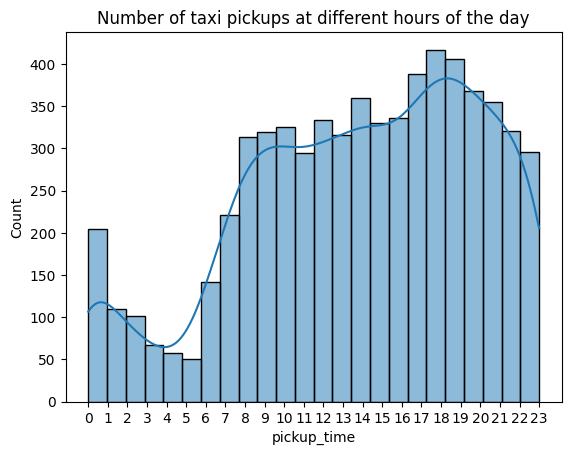

In [31]:
# How would you visualize the distribution of taxi pickups across different hours of the day? What insights would you expect to gain?

ds["pickup_time"]=pd.to_datetime(ds["pickup_time"])
ds["pickup_time"]=ds["pickup_time"].dt.hour

sns.histplot(ds["pickup_time"], bins=24, kde=True)
plt.title("Number of taxi pickups at different hours of the day")
plt.xticks(range(24))
plt.show()

# We can see that most number of pickups occurs after the evening.

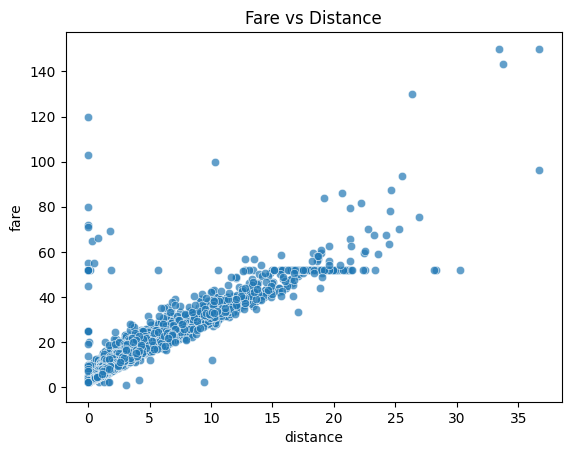

In [11]:
# What type of plot would you use to analyze the relationship between fare and distance? How would you handle overlapping data points for better readability?

sns.scatterplot(x=ds["distance"], y=ds["fare"], data=ds, alpha=0.7)
plt.title("Fare vs Distance")
plt.show()

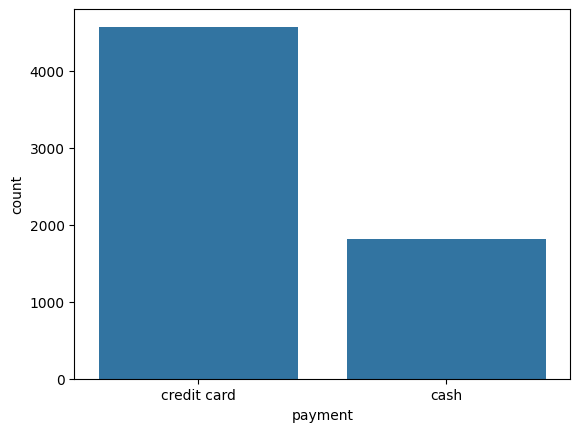

In [ ]:
# How would you visualize the proportion of different payment types used by passengers? What additional information could make this visualization more insightful?

sns.countplot(x=ds["payment"])
plt.show()

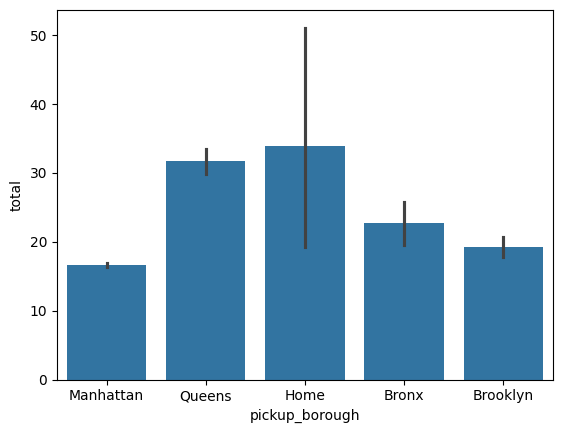

In [34]:
# If you wanted to compare total revenue across different boroughs, which visualization would you use? How would you make this visualization more effective for a business presentation?

sns.barplot(x=ds["pickup_borough"], y=ds["total"],data=ds)
plt.show()

# Home has the highest total mean values, but also greatest variability. This suggests that trips form Home have highly variable fess.
# Manhattan has the lowest mean total values and minimal variability, meaning consistent fare amounts.

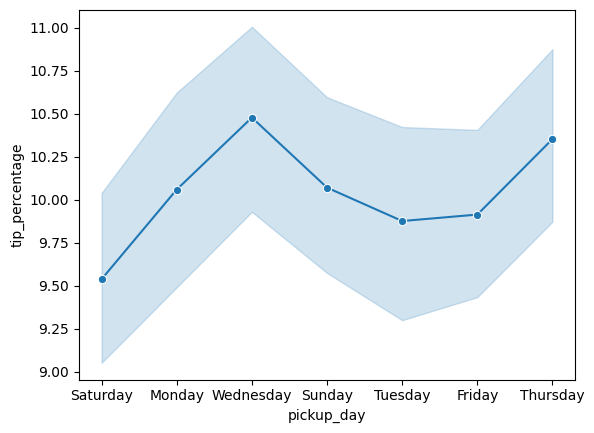

In [38]:
# How would you visualize the trend of tip percentages over different days of the week? What kind of transformations might be needed to make patterns more evident?

ds["tip_percentage"]=(ds["tip"]/ds["total"])*100
ds["pickup_day"]=ds["pickup_date"].dt.day_name()

sns.lineplot(x=ds["pickup_day"], y=ds["tip_percentage"],marker="o",data=ds)
plt.show()


Advanced Questions

In [ ]:
# How would you handle missing values in this dataset? Show different techniques and explain when to use each.

# 1.
# Here, we have replaced the missing values(nan) with some relevant values.

# 2.
# Removing rows:
ds_clean=ds.dropna()

# 3.
# You want to keep all data but replace missing values meaningfully.
da_filled = ds.fillna({"fare": ds["fare"].median(), "tip": 0, "payment": "Unknown"})
da_filled = ds.fillna(ds["fare"].median(), inplace=True)

# 4.
# Forward fill:
# The data follows a time series pattern.
df_ffill = ds.fillna(method="ffill")

# 5.
# Backward Fill (Use Next Value)
df_bfill = ds.fillna(method="bfill")
#Future values can reasonably fill missing data.

In [ ]:
# If you were given a dataset with millions of rows, how would you optimize operations like filtering and grouping?

# 1.
# Convert dataypes into category, int32, float32, to reduce memory usage.

# 2.
# Using .loc[] instead of .query()
d=ds.loc[ds["fare"]>20]

# 3.
# Using groupby()

# 4.
# Use Dask for Distributed Computing (for Millions of Rows)
import dask.dataframe as dd

df_large = dd.read_csv("large_taxi_data.csv")
df_large.groupby("payment")["fare"].mean().compute()

In [ ]:
# If this dataset were used for a machine learning model, what preprocessing steps would you take?

# First, check if any data were missing.
# Either remove rows or fill in the missing data.
# Convert the data into siutable datatypes for further processing.
# Remove outliers and inappropriate data.

In [ ]:
# How would you detect and handle outliers in the fare, tip, and total columns?

# Detect Outliers Using IQR (Interquartile Range)

Q1 = ds["fare"].quantile(0.25)
Q3 = ds["fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ds[(ds["fare"] < lower_bound) | (ds["fare"] > upper_bound)]
# You want to identify extreme values.

# Remove Outliers
df_no_outliers = ds[(ds["fare"] >= lower_bound) & (ds["fare"] <= upper_bound)]
